In [40]:
%config Completer.use_jedi = False
import warnings
warnings.filterwarnings(action='ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [41]:
from sklearn import datasets # MNIST 손글씨 데이터셋을 사용하기 위해 import 한다.
from sklearn.neighbors import KNeighborsClassifier # kNN
from sklearn.svm import SVC # SVM
from sklearn import tree # 의사결정 트리
from sklearn.ensemble import VotingClassifier # 하드/소프트 보팅을 계산하기 위해 import 한다.
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

손글씨 데이터를 불러온다.

In [42]:
mnist = datasets.load_digits()
features, labels = mnist.data, mnist.target
print(features.shape, labels.shape)

(1797, 64) (1797,)


학습 데이터와 테스트 데이터를 나눈다.

In [43]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2)
print('학습 데이터 개수: {}, 테스트 데이터 개수: {}'.format(X_train.shape[0], X_test.shape[0]))

학습 데이터 개수: 1437, 테스트 데이터 개수: 360


단일 모델이 정확도 측정  
앙상블 정확도를 측정하기에 앞서서 단일 모델들의 정확도를 kNN, SVC, 의사결정 트리 분류기를 만들어 정확도를 계산한다.

In [44]:
# kNN
knn = KNeighborsClassifier(n_neighbors=299).fit(X_train, y_train)
knn_predict = knn.predict(X_test)
print('knn accuracy: {:%}'.format(accuracy_score(y_test, knn_predict)))

knn accuracy: 85.833333%


In [45]:
# SVM
svm = SVC(C=0.1, gamma=0.003, probability=True, random_state=35).fit(X_train, y_train)
svm_predict = svm.predict(X_test)
print('svm accuracy: {:%}'.format(accuracy_score(y_test, svm_predict)))

svm accuracy: 84.722222%


In [46]:
# 의사결정 트리
dtree = tree.DecisionTreeClassifier(max_depth=8, random_state=35).fit(X_train, y_train)
dtree_predict = dtree.predict(X_test)
print('dtree accuracy: {:%}'.format(accuracy_score(y_test, dtree_predict)))

dtree accuracy: 84.166667%


확률 합계

In [47]:
knn_proba = knn.predict_proba(X_test)
# print(len(knn_proba))
print(knn_proba[0])
total = 0.0
for i in knn_proba[0]:
    total += i
print('확률 합계: {}'.format(total))

[0.         0.21070234 0.37792642 0.10367893 0.00334448 0.04347826
 0.00334448 0.02006689 0.22408027 0.01337793]
확률 합계: 1.0


In [48]:
svm_proba = svm.predict_proba(X_test)
# print(len(svm_proba))
print(svm_proba[0])
total = 0.0
for i in svm_proba[0]:
    total += i
print('확률 합계: {}'.format(total))

[2.36315107e-04 2.69576320e-04 9.95413671e-01 3.21380735e-04
 1.90909673e-04 2.85217505e-04 1.04793475e-04 2.32049681e-04
 2.36602550e-03 5.80060875e-04]
확률 합계: 0.9999999999999997


In [49]:
dtree_proba = dtree.predict_proba(X_test)
# print(len(dtree_proba))
print(dtree_proba[0])
total = 0.0
for i in dtree_proba[0]:
    total += i
print('확률 합계: {}'.format(total))

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
확률 합계: 1.0


하드 보팅, 소프트 보팅은 VotingClassifier를 사용해 쉽게 구현할 수 있다.

하드 보팅  
일반적인 투표와 같이 각 분류기의 예측값들을 모아 가장 많은 투표를 받은 예측값으로 최종 결론을 내린다.

In [50]:
voting_clf = VotingClassifier(estimators=[('knn', knn), ('svm', svm), ('decision_tree', dtree)], weights=[1, 1, 1],
                voting='hard').fit(X_train, y_train)
hard_voting_predict = voting_clf.predict(X_test)
print('hard_voting: {:%}'.format(accuracy_score(y_test, hard_voting_predict)))

hard_voting: 88.055556%


소프트 보팅

In [51]:
voting_clf = VotingClassifier(estimators=[('knn', knn), ('svm', svm), ('decision_tree', dtree)], weights=[1, 1, 1],
                voting='soft').fit(X_train, y_train)
soft_voting_predict = voting_clf.predict(X_test)
print('soft_voting: {:%}'.format(accuracy_score(y_test, soft_voting_predict)))

soft_voting: 90.833333%


단일 모델과 앙상블 모델의 정확도 비교 시각화

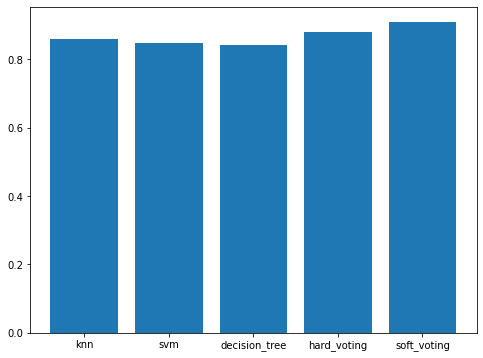

In [52]:
plt.figure(figsize=(8, 6))
x = np.arange(5)
plt.bar(x, height=[
    accuracy_score(y_test, knn_predict),
    accuracy_score(y_test, svm_predict),
    accuracy_score(y_test, dtree_predict),
    accuracy_score(y_test, hard_voting_predict),
    accuracy_score(y_test, soft_voting_predict)
])
plt.xticks(x, ['knn', 'svm', 'decision_tree', 'hard_voting', 'soft_voting'])
plt.show()